In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sympy import Point,Line

In [3]:
data = pd.read_csv('~/DataSet3/1.csv')
data.head()

,0,1502,2215,2153,1
0,1.0,1667,2072,2047,1
1,2.0,1611,1957,1906,1
2,3.0,1601,1939,1831,1
3,4.0,1643,1965,1879,1
4,5.0,1604,1959,1921,1


In [4]:
data1=data.iloc[:,1:4]
labels = data.iloc[:,-1]
data1.head()

,1502,2215,2153
0,1667,2072,2047
1,1611,1957,1906
2,1601,1939,1831
3,1643,1965,1879
4,1604,1959,1921


**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [5]:
scaler = StandardScaler()
sample=scaler.fit_transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow implementation with Sum Of Squared Error as validation matrix**

In [20]:
SSE={}
K = range(2,11)
for k in K :
    SSE[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print(labels)
    #print(sample_transformed)
    for i in range(0,k):
        #print('shit')
        cluster_datapoints = sample_transformed[labels==i]
        #print(cluster_datapoints)
        #Mean distance of data points in this cluster from center
        cluster_mean = cluster_datapoints[:,i].mean()
        print('cluster mean ='+str(cluster_mean))
        #Calculate Sum of Squared error by substracting cluster mean 
        #from distance of each point from respective centers 
        for datapoint in cluster_datapoints:
            SSE[k]+= (datapoint[i]-cluster_mean)**2
    print(SSE)

cluster mean =2.7082954373013552
cluster mean =2.603809020679229
{2: 91904.80925405874}
cluster mean =0.8591721791931067
cluster mean =4.385182167741584
cluster mean =4.618924073399247
{2: 91904.80925405874, 3: 72766.78941190445}
cluster mean =3.4484604269560957
cluster mean =0.6032368836158207
cluster mean =5.317013896615993
cluster mean =2.3448714246433293
{2: 91904.80925405874, 3: 72766.78941190445, 4: 47642.024886917}
cluster mean =3.2063711601053577
cluster mean =1.6085495924727404
cluster mean =1.4927356652328492
cluster mean =4.63419387148778
cluster mean =5.646025467816896
{2: 91904.80925405874, 3: 72766.78941190445, 4: 47642.024886917, 5: 45014.00260959689}
cluster mean =2.4370544078666816
cluster mean =2.4187272984251575
cluster mean =0.4476464428167907
cluster mean =1.7259243664440438
cluster mean =1.5493129050306134
cluster mean =1.7086804988918887
{2: 91904.80925405874, 3: 72766.78941190445, 4: 47642.024886917, 5: 45014.00260959689, 6: 41964.15250883936}
cluster mean =0.38

In [21]:
SSE_array=[]
slope=[]
for key,value in SSE.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[91904.80925405874, 72766.78941190445, 47642.024886917, 45014.00260959689, 41964.15250883936, 37215.510369648044, 37057.707774029375, 29480.157243052687, 28763.38179945507]


[[2, -19138.01984215429],
 [3, -25124.764524987448],
 [4, -2628.0222773201094],
 [5, -3049.8501007575323],
 [6, -4748.642139191317],
 [7, -157.80259561866842],
 [8, -7577.550530976689],
 [9, -716.7754435976167]]

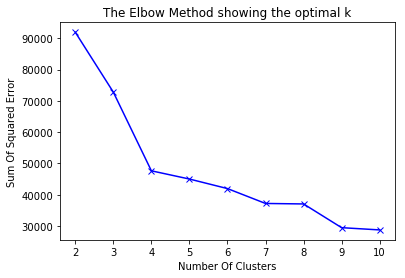

In [22]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum Of Squared Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [23]:
slope

[[2, -19138.01984215429],
 [3, -25124.764524987448],
 [4, -2628.0222773201094],
 [5, -3049.8501007575323],
 [6, -4748.642139191317],
 [7, -157.80259561866842],
 [8, -7577.550530976689],
 [9, -716.7754435976167]]

In [24]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 1
Optimal Number of Clusters = 3
Optimal Number of Clusters = 4
Optimal Number of Clusters = 6


In [25]:
distances=[]
for i in range(0,9):
    p1=Point(2,SSE_array[0])
    p2=Point(10,SSE_array[8])
    l1 = Line(p1,p2)
    p=Point(i+2,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 4
